In [5]:
!pip install pyspark
from pyspark.sql import SparkSession

In [6]:
sc = SparkSession.builder.appName('test').getOrCreate()

In [8]:
# 1.Load the sales data into a PySpark DataFrame so we can work with it.
df = sc.read.csv('furniture.csv', header=True, inferSchema=True)
df.show()
df.count()

+---------+----------+------------+--------+-------+----------+---------+
|  OrderID|CustomerID|ProductNames|Quantity|  Price| OrderDate|   Region|
+---------+----------+------------+--------+-------+----------+---------+
|ORD100000|  CUST9055|   Bookshelf|       2|1865.65|2023-03-12|   France|
|ORD100001|  CUST1538|        Sofa|       4|1726.87|2024-03-08|    China|
|ORD100002|  CUST6940|Coffee Table|       4| 760.89|2022-06-20|    China|
|ORD100003|  CUST1625|     Dresser|       5| 368.03|2023-05-01|   France|
|ORD100004|  CUST9204|    TV Stand|       1| 753.76|2023-07-03|    India|
|ORD100005|  CUST6897|    Recliner|       2|1042.94|2024-07-17|Australia|
|ORD100006|  CUST3475|Coffee Table|       6| 753.17|2022-06-24|    China|
|ORD100007|  CUST6039|     Dresser|       8|1989.12|2023-04-19|Australia|
|ORD100008|  CUST9930|Coffee Table|       8|  91.61|2023-12-27|  Germany|
|ORD100009|  CUST2570|        Sofa|       3|1390.53|2023-03-28|   France|
|ORD100010|  CUST5997|     Dresser|   

1500

In [9]:
# 2.Clean the data by fixing missing values and making sure the dates are in the right format.

df.dropDuplicates()
df.dropna()
print(df.count())
df.printSchema()

1500
root
 |-- OrderID: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- ProductNames: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: double (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- Region: string (nullable = true)



In [10]:
# 3.Calculate the total sales for each product to see which products bring in the most money.

from pyspark.sql.functions import desc, round, sum, col

(
    df.groupBy('ProductNames')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy(desc('TotalSales'))
    .show()
)

+------------+----------+
|ProductNames|TotalSales|
+------------+----------+
|    Recliner|  176088.3|
|Office Chair|  175345.3|
|    Wardrobe| 163726.85|
|Coffee Table|  157625.7|
|   Bed Frame| 152786.91|
|Dining Table| 150707.93|
|   Bookshelf|  149913.7|
|        Sofa| 147653.83|
|    TV Stand| 143703.18|
|     Dresser| 139437.91|
+------------+----------+



In [11]:
# 4.Find out which products have sold the most units overall.

(
    df.groupBy('ProductNames')
    .agg(sum('Quantity').alias('TotalSold'))
    .orderBy(desc('TotalSold'))
    .show()
)

+------------+---------+
|ProductNames|TotalSold|
+------------+---------+
|Office Chair|      921|
|   Bookshelf|      882|
|    Wardrobe|      882|
|    Recliner|      872|
|Coffee Table|      856|
|   Bed Frame|      835|
|        Sofa|      783|
|Dining Table|      744|
|    TV Stand|      709|
|     Dresser|      707|
+------------+---------+



In [12]:
# 5.Analyze how much revenue each region generates to compare performance across locations.
(
    df.groupBy('OrderDate')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy(desc('TotalSales'))
    .show()
)


+----------+----------+
| OrderDate|TotalSales|
+----------+----------+
|2024-03-20|   7368.86|
|2024-06-02|   7199.34|
|2023-11-24|   7183.07|
|2021-10-28|   7138.58|
|2021-10-27|   7130.21|
|2024-01-05|   6228.87|
|2021-11-01|   6221.28|
|2022-11-23|   5909.39|
|2024-08-22|   5738.38|
|2022-03-07|   5611.24|
|2022-07-03|   5558.91|
|2023-05-05|   5479.41|
|2022-08-28|   5436.46|
|2021-10-18|   5392.51|
|2022-03-23|   5248.09|
|2024-05-07|   5066.21|
|2024-03-14|    5034.3|
|2022-04-04|   5031.55|
|2022-03-22|   4938.22|
|2022-09-04|   4904.69|
+----------+----------+
only showing top 20 rows



In [13]:
# 6.Look at monthly and yearly sales patterns to understand which times of the year sales are highest.

#6.1 monthly

from pyspark.sql.functions import year, month, date_format

(
    df.withColumn('MonthYear', date_format('OrderDate', 'yyyy-MM'))
    .groupBy('MonthYear')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy('MonthYear')
    .show()
)


+---------+----------+
|MonthYear|TotalSales|
+---------+----------+
|  2021-10|  40387.38|
|  2021-11|  37634.81|
|  2021-12|  44547.86|
|  2022-01|  35851.68|
|  2022-02|   26682.5|
|  2022-03|  53903.42|
|  2022-04|  44785.47|
|  2022-05|  44709.65|
|  2022-06|  41153.84|
|  2022-07|  51177.91|
|  2022-08|  49083.47|
|  2022-09|  40638.26|
|  2022-10|  30614.97|
|  2022-11|   49112.0|
|  2022-12|  40275.13|
|  2023-01|  28786.41|
|  2023-02|  35666.32|
|  2023-03|  50103.92|
|  2023-04|  39763.02|
|  2023-05|   36644.2|
+---------+----------+
only showing top 20 rows



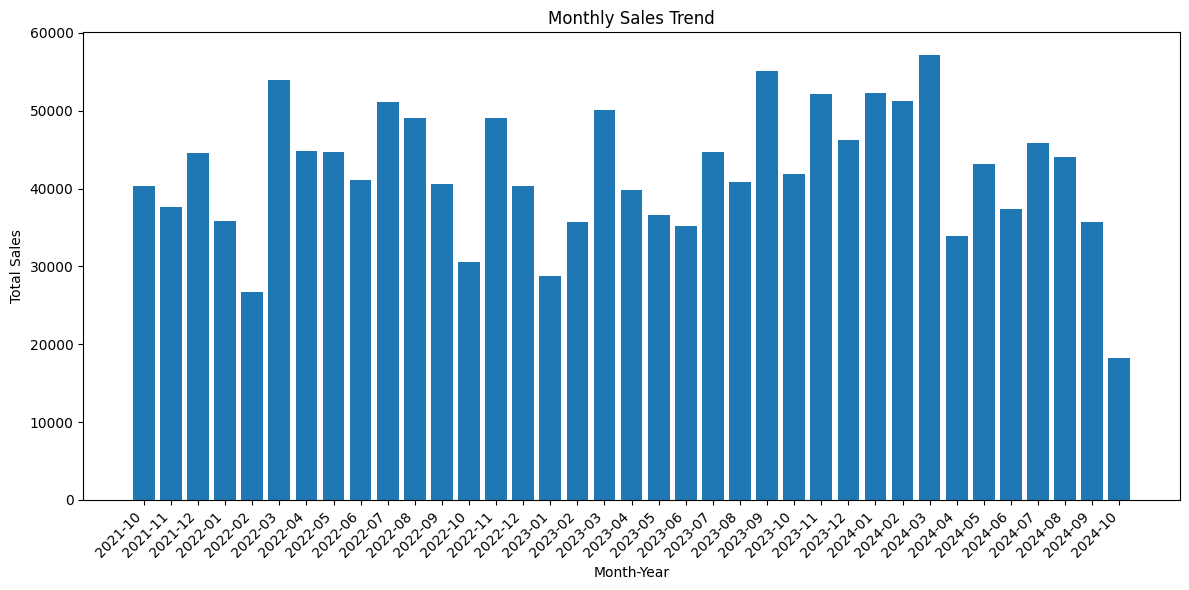

In [15]:
import matplotlib.pyplot as plt

monthly_sales_pd = (
    df.withColumn('MonthYear', date_format('OrderDate', 'yyyy-MM'))
    .groupBy('MonthYear')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy('MonthYear')
    .toPandas()
)
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_pd['MonthYear'], monthly_sales_pd['TotalSales'])
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# 6.Look at monthly and yearly sales patterns to understand which times of the year sales are highest.

#6.1 yearly

(
    df.withColumn('Year', date_format('OrderDate', 'yyyy'))
    .groupBy('Year')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy('Year')
    .show()
)

+----+----------+
|Year|TotalSales|
+----+----------+
|2021| 122570.05|
|2022|  507988.3|
|2023| 507073.39|
|2024| 419357.87|
+----+----------+



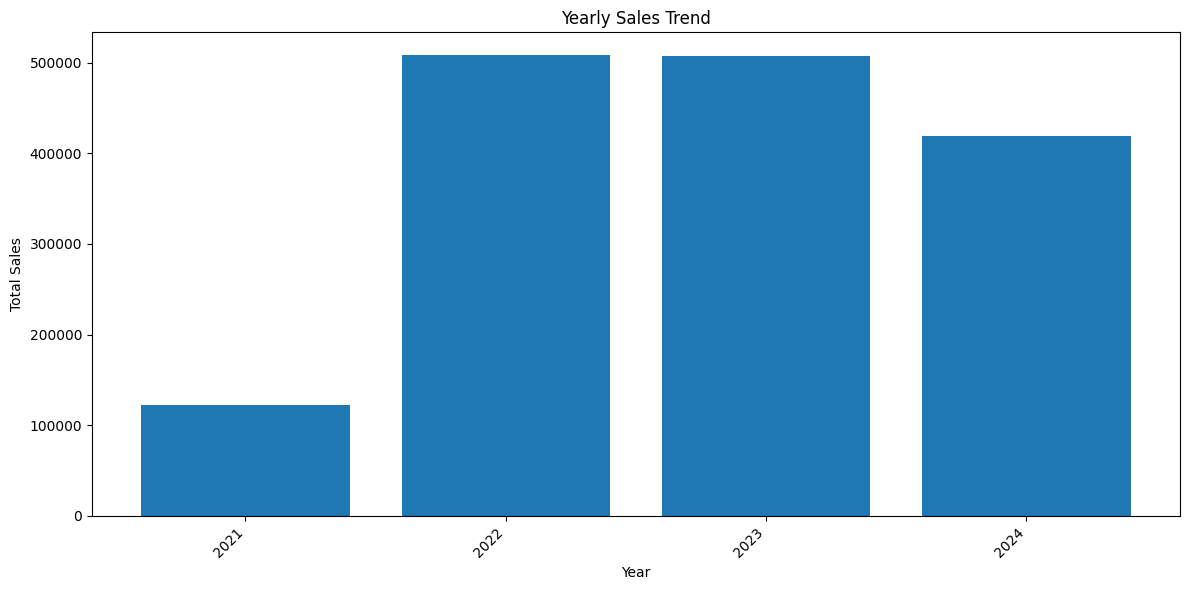

In [17]:
yearly_sales_pd = (
    df.withColumn('Year', date_format('OrderDate', 'yyyy'))
    .groupBy('Year')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy('Year')
    .toPandas()
)

plt.figure(figsize=(12, 6))
plt.bar(yearly_sales_pd['Year'], yearly_sales_pd['TotalSales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# 7.Group customers based on how much they spend to identify the most valuable ones.
from pyspark.sql.functions import *

# Calculate total spending for each customer
customer_spending = df.groupBy('CustomerID') \
    .agg(sum('Price').alias('TotalSales')) \
    .withColumn('TotalSales', round(col('TotalSales'), 2))

# Define spending thresholds for categorization
high_spending_threshold = 3000
medium_spending_threshold = 1500

# Add a new column 'SpendingCategory' based on total spending
customer_spending = customer_spending.withColumn(
    'SpendingCategory',
    when(col('TotalSales') >= high_spending_threshold, lit('High Spender'))
    .when(col('TotalSales') >= medium_spending_threshold, lit('Medium Spender'))
    .otherwise(lit('Low Spender'))
)

# Join with the original DataFrame to include customer characteristics
customer_details = df.join(customer_spending, on='CustomerID', how='inner')


# Group by 'SpendingCategory' and 'Region' and analyze characteristics
region_spending = customer_details.groupBy('SpendingCategory', 'Region') \
    .agg(
        count('*').alias('CustomerCount'),
        round(avg('Quantity'), 2).alias('AvgQuantity'),
        round(avg('Price'), 2).alias('AvgPrice')
    )

# Pivot the table to have regions as columns
region_spending_pivot = region_spending.groupBy('SpendingCategory') \
    .pivot('Region') \
    .agg(first('CustomerCount').alias('CustomerCount'),
         first('AvgQuantity').alias('AvgQuantity'),
         first('AvgPrice').alias('AvgPrice'))

region_spending_pivot.show()


+----------------+-----------------------+---------------------+------------------+--------------------+------------------+---------------+--------------------+------------------+---------------+-------------------+-----------------+--------------+--------------------+------------------+---------------+---------------------+-------------------+----------------+-------------------+-----------------+--------------+-------------------+-----------------+--------------+----------------+--------------+-----------+-----------------+---------------+------------+
|SpendingCategory|Australia_CustomerCount|Australia_AvgQuantity|Australia_AvgPrice|Brazil_CustomerCount|Brazil_AvgQuantity|Brazil_AvgPrice|Canada_CustomerCount|Canada_AvgQuantity|Canada_AvgPrice|China_CustomerCount|China_AvgQuantity|China_AvgPrice|France_CustomerCount|France_AvgQuantity|France_AvgPrice|Germany_CustomerCount|Germany_AvgQuantity|Germany_AvgPrice|India_CustomerCount|India_AvgQuantity|India_AvgPrice|Japan_CustomerCount|Jap

In [19]:
# 8.Calculate the average amount spent on each order to understand typical customer spending.

df.agg(avg('Price').alias('AvgAmount')) \
    .withColumn('AvgAmount', round(col('AvgAmount'), 2)).show()

+---------+
|AvgAmount|
+---------+
|  1037.99|
+---------+



In [20]:
# 9.Compare how well each product sells in different regions to find out local preferences.
(df.groupBy('ProductNames', 'Region') \
    .agg(
        sum('Quantity').alias('AmountSold') )
    .orderBy('ProductNames','Region')
    ).show()


+------------+---------+----------+
|ProductNames|   Region|AmountSold|
+------------+---------+----------+
|   Bed Frame|Australia|        99|
|   Bed Frame|   Brazil|        75|
|   Bed Frame|   Canada|       123|
|   Bed Frame|    China|       132|
|   Bed Frame|   France|        42|
|   Bed Frame|  Germany|        78|
|   Bed Frame|    India|        99|
|   Bed Frame|    Japan|        55|
|   Bed Frame|       UK|        59|
|   Bed Frame|      USA|        73|
|   Bookshelf|Australia|        78|
|   Bookshelf|   Brazil|       119|
|   Bookshelf|   Canada|        88|
|   Bookshelf|    China|        56|
|   Bookshelf|   France|       127|
|   Bookshelf|  Germany|       103|
|   Bookshelf|    India|        25|
|   Bookshelf|    Japan|       115|
|   Bookshelf|       UK|        73|
|   Bookshelf|      USA|        98|
+------------+---------+----------+
only showing top 20 rows



In [21]:
# 10.Identify products with consistently low sales to decide if any changes are needed.

#Monthly
(
    df.withColumn('MonthYear', date_format('OrderDate', 'yyyy-MM'))
    .groupBy('MonthYear','ProductNames')
    .agg(sum('Quantity').alias('TotalQuantity'))
    .orderBy('ProductNames','TotalQuantity')
    .show()
)


+---------+------------+-------------+
|MonthYear|ProductNames|TotalQuantity|
+---------+------------+-------------+
|  2023-08|   Bed Frame|            4|
|  2022-09|   Bed Frame|            6|
|  2024-10|   Bed Frame|            8|
|  2023-06|   Bed Frame|           10|
|  2022-08|   Bed Frame|           11|
|  2024-05|   Bed Frame|           12|
|  2022-01|   Bed Frame|           13|
|  2022-06|   Bed Frame|           13|
|  2022-10|   Bed Frame|           14|
|  2023-02|   Bed Frame|           15|
|  2024-06|   Bed Frame|           15|
|  2023-04|   Bed Frame|           15|
|  2021-10|   Bed Frame|           16|
|  2024-08|   Bed Frame|           17|
|  2024-02|   Bed Frame|           19|
|  2021-12|   Bed Frame|           20|
|  2023-07|   Bed Frame|           21|
|  2024-04|   Bed Frame|           21|
|  2022-05|   Bed Frame|           21|
|  2022-02|   Bed Frame|           22|
+---------+------------+-------------+
only showing top 20 rows



In [22]:
#Yearly
(
    df.withColumn('Year', date_format('OrderDate', 'yyyy'))
    .groupBy('Year','ProductNames')
    .agg(sum('Quantity').alias('TotalQuantity'))
    .orderBy('ProductNames','TotalQuantity')
    .show()
)

+----+------------+-------------+
|Year|ProductNames|TotalQuantity|
+----+------------+-------------+
|2021|   Bed Frame|           64|
|2024|   Bed Frame|          229|
|2022|   Bed Frame|          267|
|2023|   Bed Frame|          275|
|2021|   Bookshelf|           89|
|2022|   Bookshelf|          222|
|2024|   Bookshelf|          255|
|2023|   Bookshelf|          316|
|2021|Coffee Table|           52|
|2024|Coffee Table|          252|
|2022|Coffee Table|          270|
|2023|Coffee Table|          282|
|2021|Dining Table|           57|
|2024|Dining Table|          222|
|2023|Dining Table|          228|
|2022|Dining Table|          237|
|2021|     Dresser|           41|
|2024|     Dresser|          191|
|2022|     Dresser|          222|
|2023|     Dresser|          253|
+----+------------+-------------+
only showing top 20 rows



In [26]:
# 11.Find the specific days with the highest sales to understand when demand peaks.

#day of the week
(
    df.withColumn('DayOfTheWeek', date_format('OrderDate', 'EEEE'))
    .groupBy('DayOfTheWeek')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy(desc('TotalSales'))
    .show()
)


+------------+----------+
|DayOfTheWeek|TotalSales|
+------------+----------+
|      Friday| 234913.34|
|   Wednesday| 233013.72|
|      Sunday| 226087.73|
|      Monday| 225493.19|
|     Tuesday| 221908.77|
|    Saturday| 217535.46|
|    Thursday|  198037.4|
+------------+----------+



In [27]:
#date
(
    df.groupBy('OrderDate')
    .agg(sum('Price').alias('TotalSales'))
    .withColumn('TotalSales', round(col('TotalSales'), 2))
    .orderBy(desc('TotalSales'))
    .show()
)


+----------+----------+
| OrderDate|TotalSales|
+----------+----------+
|2024-03-20|   7368.86|
|2024-06-02|   7199.34|
|2023-11-24|   7183.07|
|2021-10-28|   7138.58|
|2021-10-27|   7130.21|
|2024-01-05|   6228.87|
|2021-11-01|   6221.28|
|2022-11-23|   5909.39|
|2024-08-22|   5738.38|
|2022-03-07|   5611.24|
|2022-07-03|   5558.91|
|2023-05-05|   5479.41|
|2022-08-28|   5436.46|
|2021-10-18|   5392.51|
|2022-03-23|   5248.09|
|2024-05-07|   5066.21|
|2024-03-14|    5034.3|
|2022-04-04|   5031.55|
|2022-03-22|   4938.22|
|2022-09-04|   4904.69|
+----------+----------+
only showing top 20 rows



In [34]:
# 12.Suggest the right stock levels for each product based on past sales patterns.
(
    df.withColumn('Month', date_format('OrderDate', 'MM'))
      .groupBy('Month','ProductNames')
      .agg(avg('Quantity').alias('SuggestedStock'))
      .withColumn('SuggestedStock', ceil(col('SuggestedStock')))
      .orderBy('Month', 'ProductNames')
      .show()
)

+-----+------------+--------------+
|Month|ProductNames|SuggestedStock|
+-----+------------+--------------+
|   01|   Bed Frame|             7|
|   01|   Bookshelf|             6|
|   01|Coffee Table|             5|
|   01|Dining Table|             5|
|   01|     Dresser|             5|
|   01|Office Chair|             6|
|   01|    Recliner|             8|
|   01|        Sofa|             6|
|   01|    TV Stand|             5|
|   01|    Wardrobe|             7|
|   02|   Bed Frame|             6|
|   02|   Bookshelf|             6|
|   02|Coffee Table|             6|
|   02|Dining Table|             6|
|   02|     Dresser|             7|
|   02|Office Chair|             6|
|   02|    Recliner|             6|
|   02|        Sofa|             5|
|   02|    TV Stand|             6|
|   02|    Wardrobe|             7|
+-----+------------+--------------+
only showing top 20 rows

